# Student Activity: Financial Forecasting

In this activity, Harold's manager wants Harold to take a look at one year's worth of `TSLA` stock prices and plot a potential stock trajectory for where `TSLA` stock prices could go in the next `3` years. In addition, he would like to know how a $10,000 investment would perform given the simulated results.

Help Harold by creating a Monte Carlo simulation that simulates the next `252 * 3` trading days using three years worth of `TSLA` stock data. Plot the simulated results of `TSLA` daily returns over the next `3` years as well as the corresponding simulated outcomes.

In [1]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get 3 Years Worth of Data via API Call and Read in as DataFrame 

In [3]:
# Set the ticker
ticker = "TSLA"

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2018-08-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-08-04", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for TSLA
ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

ticker_data.head()

,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2018-08-06 04:00:00+00:00,341.99,354.98,341.8200,94745,345.46,8707735,348.702911
2018-08-07 04:00:00+00:00,379.57,387.46,339.1501,332458,343.84,31039717,364.264530
2018-08-08 04:00:00+00:00,370.34,382.64,367.1200,278774,369.09,24881027,374.048047
2018-08-09 04:00:00+00:00,352.45,367.01,345.7300,195135,365.55,17366342,355.540496
2018-08-10 04:00:00+00:00,355.53,360.00,346.0000,119688,354.00,11655079,353.672359


In [4]:
# Reorganize the DataFrame
ticker_data = pd.concat([ticker_data], axis=1, keys=["TSLA"])

# Display sample data
ticker_data.head()

TSLA                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2018-08-06 04:00:00+00:00  341.99  354.98  341.8200       94745  345.46   
2018-08-07 04:00:00+00:00  379.57  387.46  339.1501      332458  343.84   
2018-08-08 04:00:00+00:00  370.34  382.64  367.1200      278774  369.09   
2018-08-09 04:00:00+00:00  352.45  367.01  345.7300      195135  365.55   
2018-08-10 04:00:00+00:00  355.53  360.00  346.0000      119688  354.00   

                                                 
                             volume        vwap  
timestamp                                        
2018-08-06 04:00:00+00:00   8707735  348.702911  
2018-08-07 04:00:00+00:00  31039717  364.264530  
2018-08-08 04:00:00+00:00  24881027  374.048047  
2018-08-09 04:00:00+00:00  17366342  355.540496  
2018-08-10 04:00:00+00:00  11655079  353.672359

### Run the Monte Carlo Simulation

In [5]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_TSLA = MCSimulation(
    ticker_data,
    num_simulation=num_sims,
    num_trading_days=252*3
)

In [6]:
# Run Monte Carlo simulations to forecast three years daily returns
MC_TSLA.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 100.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Predicting the Future with Monte Carlo Simulations/Activity-5.3-Financial_Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Predicting the Future with Monte Carlo Simulations/Activity-5.3-Financial_Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumul

Running Monte Carlo simulation number 200.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Predicting the Future with Monte Carlo Simulations/Activity-5.3-Financial_Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Predicting the Future with Monte Carlo Simulations/Activity-5.3-Financial_Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumul

Running Monte Carlo simulation number 300.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Predicting the Future with Monte Carlo Simulations/Activity-5.3-Financial_Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Predicting the Future with Monte Carlo Simulations/Activity-5.3-Financial_Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumul

Running Monte Carlo simulation number 400.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Predicting the Future with Monte Carlo Simulations/Activity-5.3-Financial_Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Predicting the Future with Monte Carlo Simulations/Activity-5.3-Financial_Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumul

Running Monte Carlo simulation number 500.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Predicting the Future with Monte Carlo Simulations/Activity-5.3-Financial_Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Predicting the Future with Monte Carlo Simulations/Activity-5.3-Financial_Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumul

Running Monte Carlo simulation number 600.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Predicting the Future with Monte Carlo Simulations/Activity-5.3-Financial_Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Predicting the Future with Monte Carlo Simulations/Activity-5.3-Financial_Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumul

Running Monte Carlo simulation number 700.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Predicting the Future with Monte Carlo Simulations/Activity-5.3-Financial_Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Predicting the Future with Monte Carlo Simulations/Activity-5.3-Financial_Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumul

Running Monte Carlo simulation number 800.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Predicting the Future with Monte Carlo Simulations/Activity-5.3-Financial_Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Predicting the Future with Monte Carlo Simulations/Activity-5.3-Financial_Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumul

Running Monte Carlo simulation number 900.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Predicting the Future with Monte Carlo Simulations/Activity-5.3-Financial_Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Predicting the Future with Monte Carlo Simulations/Activity-5.3-Financial_Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumul

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004645,1.066031,1.036403,0.939162,1.006805,0.943064,1.049864,0.903011,1.036024,0.971242,...,1.047547,1.001451,1.010253,0.974422,1.021112,0.957412,1.070240,0.985431,1.025680,0.983767
2,1.011593,1.121779,1.109968,1.002141,1.043197,0.860107,1.071858,0.893979,0.970980,0.982125,...,1.043888,1.030934,1.050609,1.042556,1.037233,0.958522,1.101265,0.941946,1.062856,1.041039
3,1.041585,1.078473,1.147626,1.030506,1.000179,0.907662,1.053358,0.896228,1.001799,1.011134,...,1.061477,1.127232,0.982162,1.040757,0.977658,0.989260,1.137568,0.863439,1.005813,1.025198
4,1.049964,1.078818,1.213785,1.063218,0.978207,0.887269,1.038584,0.962395,1.048675,1.020679,...,1.025238,1.164173,1.056423,1.072587,0.918423,0.948660,1.189847,0.867887,1.003090,1.039067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1.455250,1.038180,0.458581,0.615904,2.468323,3.809440,1.699372,0.779661,24.162027,13.780616,...,0.184642,9.795291,2.855993,27.730124,0.411799,2.673072,38.265987,2.714379,2.232842,0.288855
753,1.446059,1.058702,0.468009,0.571923,2.385889,3.737863,1.723458,0.794028,23.569638,14.282872,...,0.182070,10.651831,2.739728,27.506277,0.414621,2.599152,35.681630,2.424871,2.158807,0.284291
754,1.417426,0.984265,0.424038,0.589601,2.168885,3.505249,1.722123,0.866659,24.660183,14.847136,...,0.175621,11.016639,2.720130,25.380530,0.453160,2.612983,32.644527,2.414743,2.038708,0.280488
755,1.500122,1.005387,0.391849,0.559418,2.245715,3.384147,1.967010,0.932741,24.533002,16.461720,...,0.192319,10.388778,2.888799,29.746262,0.458731,2.772332,32.033924,2.503590,1.826320,0.294717


### With these results, create a DataFrame which holds the mean, median, minimum, and maximum simulated performance.

In [7]:
# Compute summary statistics from the simulated daily returns
# Calculate the stat across each row and convert the result to a list 
simulated_returns_stats = {
    'mean': list(MC_TSLA.simulated_return.mean(axis=1)),
    'median': list(MC_TSLA.simulated_return.median(axis=1)),
    'min': list(MC_TSLA.simulated_return.min(axis=1)),
    'max': list(MC_TSLA.simulated_return.max(axis=1)),
}

# Create a DataFrame with the summary statistics
simulated_returns_df = pd.DataFrame(simulated_returns_stats)

# Display sample data
simulated_returns_df.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.003475,1.003618,0.819159,1.197110
2,1.006245,1.005542,0.755053,1.307550
3,1.009465,1.006993,0.752587,1.323066
4,1.012180,1.009147,0.654479,1.432258


### Plot the Simulated Cumulative Return Trajectory for `TSLA` over the Next Three Years (252*3 Trading Days)

#### Use just the `mean` and `median` forecasts.

<Axes: >

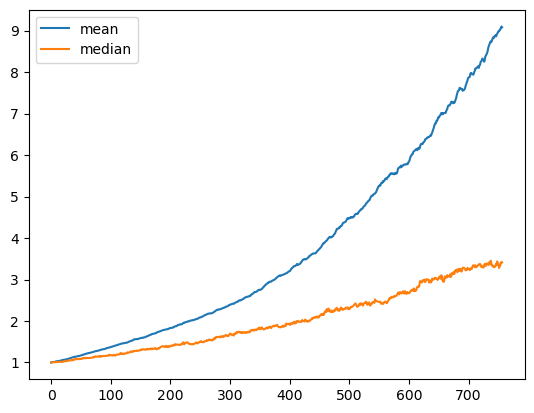

In [8]:
# Use the `plot` function to visually analyze TSLA cumulative returns over the next three hears
# (Plot both mean and median forecasted cumulative return)
simulated_returns_df[['mean', 'median']].plot()

### Calculate the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next Three Years

In [9]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment*simulated_returns_df

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10034.751197,10036.183940,8191.590749,11971.099026
2,10062.446324,10055.417790,7550.525165,13075.500165
3,10094.654926,10069.932175,7525.870738,13230.659528
4,10121.803115,10091.465434,6544.790257,14322.576631


### Plot the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next `252` Trading Days

<Axes: >

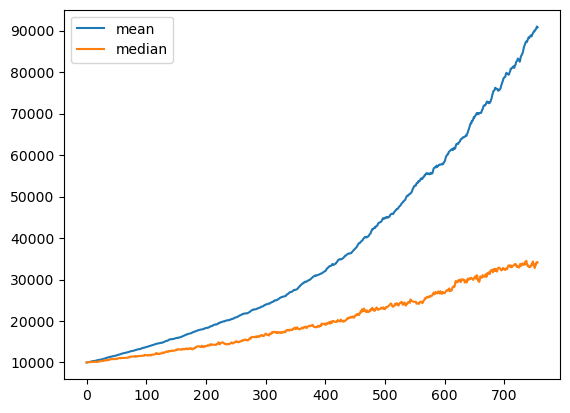

In [10]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl[['mean', 'median']].plot()

### Calculate the range of the possible outcomes of our $10,000 investments in `TSLA` stocks

In [11]:
# Fetch summary statistics from the Monte Carlo simulation results
# Hint: Use the `summarize_cumulative_return` function
tbl = MC_TSLA.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               9.080062
std               17.658786
min                0.043287
25%                1.255489
50%                3.412787
75%                9.639224
max              252.602426
95% CI Lower       0.200030
95% CI Upper      52.234664
Name: 756, dtype: float64


In [12]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower = round(tbl[8]*initial_investment, 2)
ci_upper = round(tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $2000.3 and $522346.64.
